In [509]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder


# Librerias para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# Fuentes y estilos
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

font = {'family':'serif',
       'color':'darkred',
       'weight':'normal',
       'size':16,
       }


# Librerias para clustering
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [510]:
os.chdir('E:/DS/Kaggle')
# Load data
probs = pd.read_csv('./page_probs.csv')
page = pd.read_csv('./PAGE.csv')

In [511]:
probs = pd.merge(probs, page, how='inner')
probs = probs.set_index('PAGE')
probs.head()

,conversion+1,conversion+2,conversion+3,user_count,freq,proportion,prob1,ord1,prob2,ord2,prob3,ord3,PAGE_descripcion
PAGE,,,,,,,,,,,,,
1,2619.0,2161.0,2150.0,8013,257914,0.014379,0.010155,178.0,0.008379,199.0,0.008336,168.0,WEB : EMINENT
2,42753.0,35780.0,35702.0,11642,2935681,0.163667,0.014563,344.0,0.012188,363.0,0.012161,323.0,/LOGIN
3,43812.0,36594.0,36507.0,11578,2838128,0.158228,0.015437,372.0,0.012894,378.0,0.012863,342.0,/INICIO
4,6812.0,6106.0,5885.0,11234,526725,0.029365,0.012933,289.0,0.011592,339.0,0.011173,290.0,/CUENTAS/MIS-CUENTAS
5,9828.0,7981.0,8006.0,11405,660189,0.036806,0.014887,355.0,0.012089,359.0,0.012127,322.0,/ERROR/SESIONEXPIRADA


In [512]:
df = probs.loc[
               (probs['freq'] > 1)
               ,['user_count', 'proportion','prob1', 'prob2','prob3']]#,'PAGE_descripcion', 'freq']]


df = df.drop([2,3])
df.sort_values(by='proportion', ascending=False).head()


,user_count,proportion,prob1,prob2,prob3
PAGE,,,,,
21,10709,0.040315,0.012718,0.010869,0.011222
27,11044,0.037315,0.016885,0.014670,0.015313
5,11405,0.036806,0.014887,0.012089,0.012127
40,10572,0.035838,0.012822,0.011756,0.013237
4,11234,0.029365,0.012933,0.011592,0.011173


## K-Means
#### Estandarizacion

In [513]:
names = df.columns
scaler = preprocessing.StandardScaler()
sdf = scaler.fit_transform(df)
sdf = pd.DataFrame(sdf, columns = names)
sdf.head()

,user_count,proportion,prob1,prob2,prob3
0,5.034863,5.082020,-0.091132,-0.062396,-0.062798
1,7.204769,10.548009,-0.001306,0.075370,0.078976
2,7.319967,13.261859,0.061869,0.096658,0.126657
3,6.008322,1.752641,0.034401,0.028595,0.077255
4,0.561663,-0.106065,-0.057610,-0.189444,0.043817


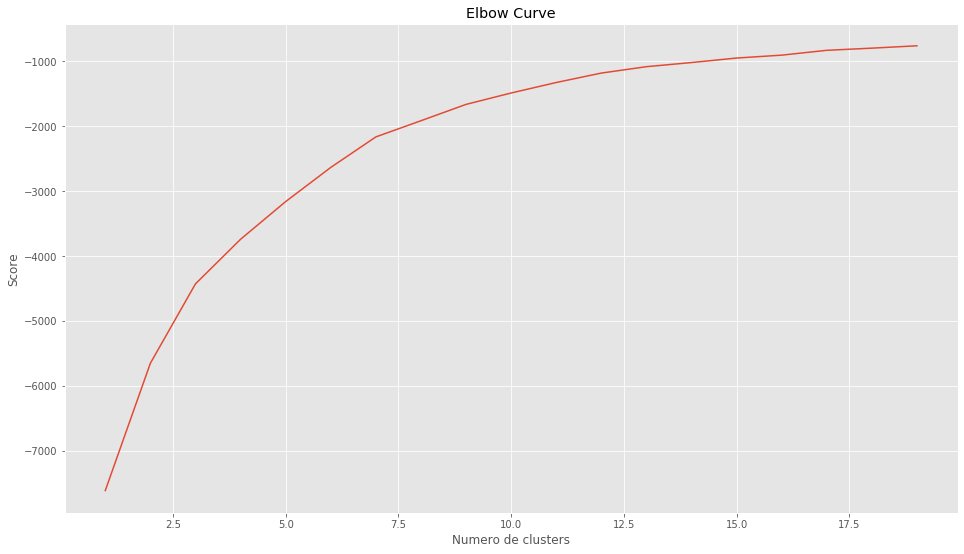

In [514]:
X = np.array(sdf)
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(Nc, score)
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [515]:
n=7

In [516]:
kmeans = KMeans(n_clusters=n).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.04487876 -0.10724947  0.38467956  0.36033592  0.38151612]
 [-0.27917529 -0.14518674 -0.28939386 -0.32598331 -0.38852946]
 [ 6.39460743 10.73617302  0.02069982  0.0983701   0.15733703]
 [-0.36009201 -0.16226312  2.17869531 12.82198858 -0.47942501]
 [ 4.17802507  1.96585187  0.14300044  0.16348036  0.22941501]
 [-0.36059727 -0.16223432 15.29774526 -0.42158882 -0.47942501]
 [-0.14179868 -0.11642724  0.62176914  1.94834388  4.60353049]]


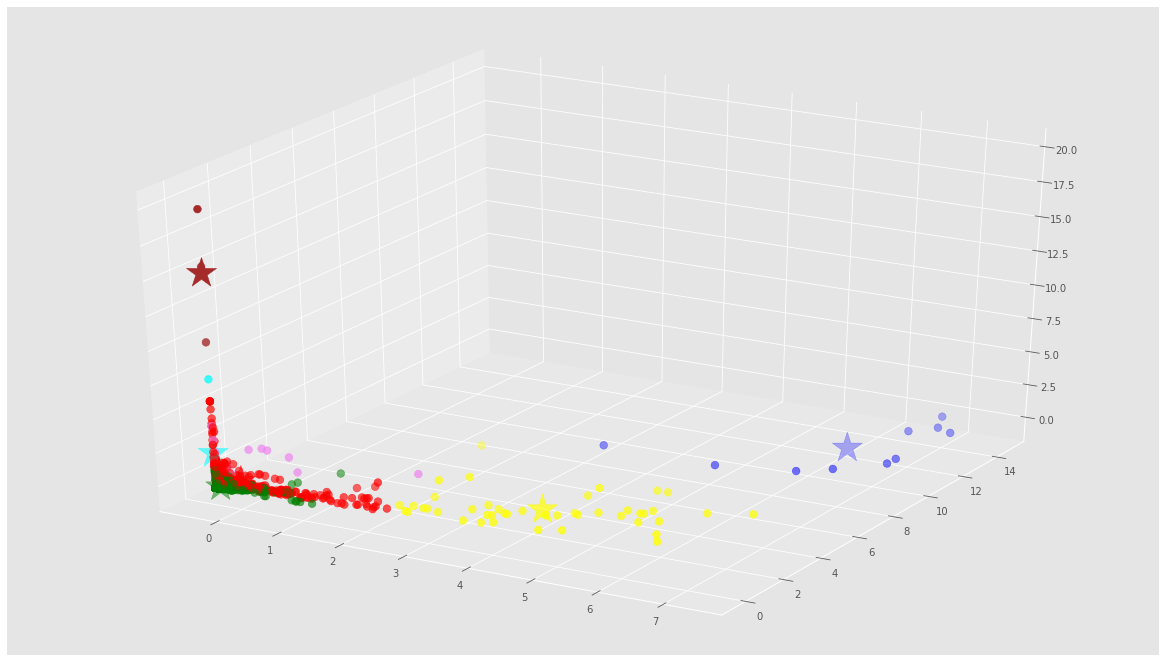

In [517]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow','brown','violet']
km=[]
for row in labels:
    km.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=km,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

## Gaussian Mixture Model

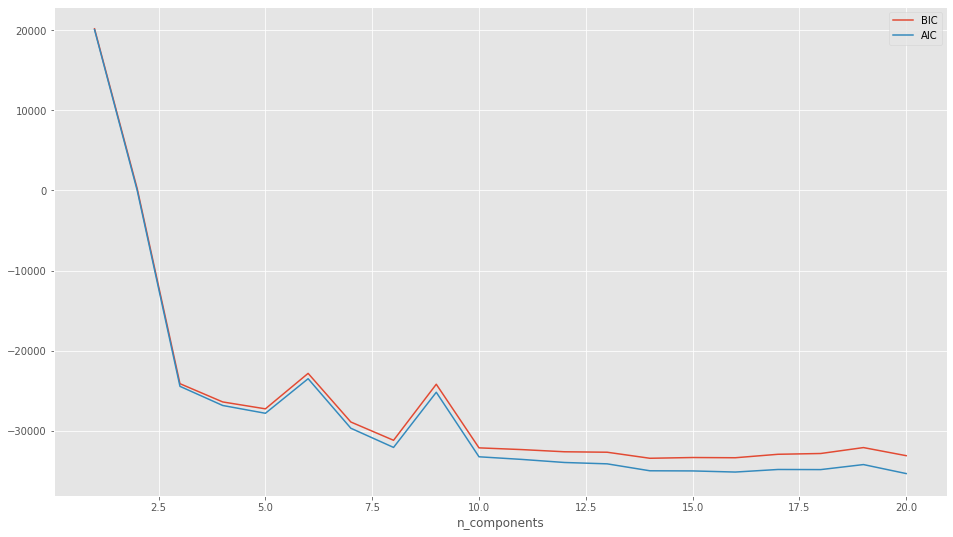

In [518]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [519]:
n=5

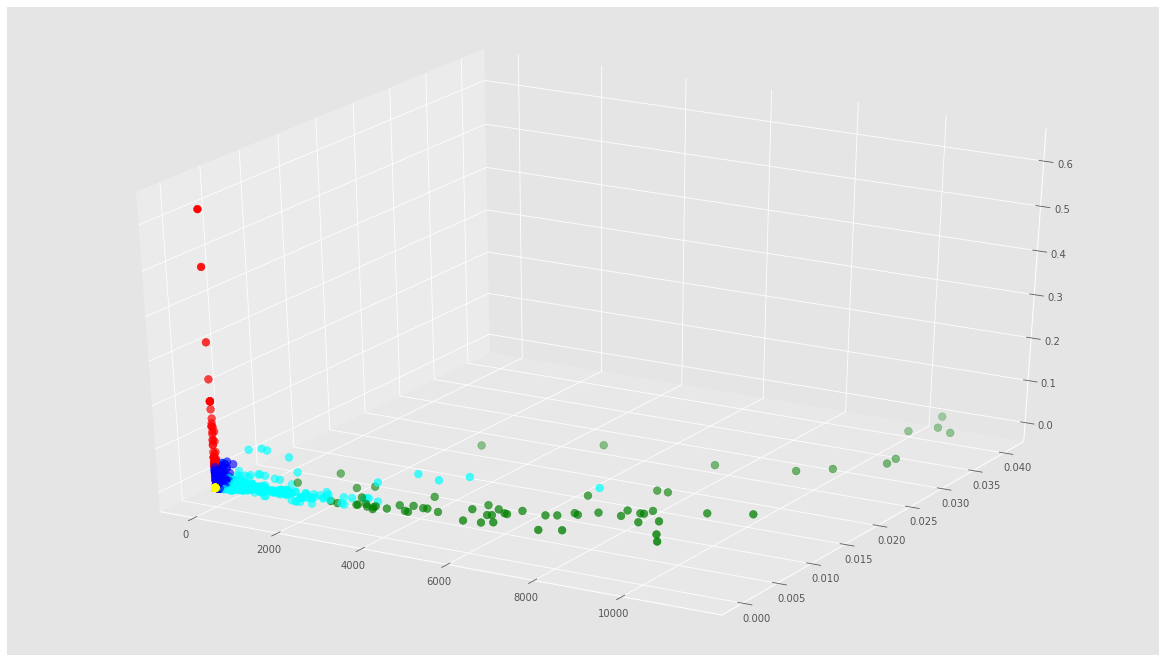

In [520]:
from sklearn.mixture import GaussianMixture
X = np.array(df)
#Predict GMM cluster membership
gm_labels = GaussianMixture(n_components=n, random_state=0).fit(X).predict(X)
cmap = 'tab10'

colores=['red','green','blue','cyan','yellow','brown','violet','black','lime','pink']
gm=[]
for row in gm_labels:
    gm.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=gm,s=60)
# ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()


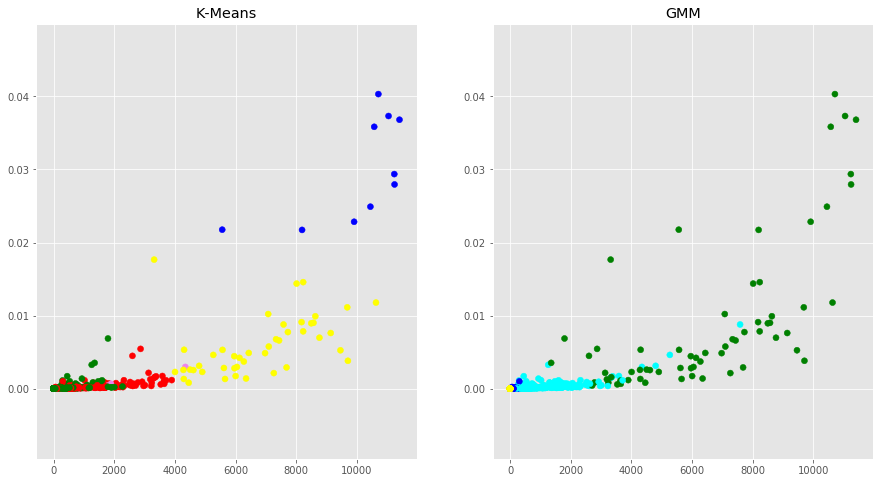

In [521]:

plt.figure(figsize=(15,8))
plt.subplot(121, title='K-Means')
plt.scatter(X[:,0], X[:,1], c=km, cmap=cmap)
plt.subplot(122, title='GMM')
plt.scatter(X[:,0], X[:,1], c=gm, cmap=cmap)
plt.show()

In [522]:
print(np.bincount(labels))
print(np.bincount(gm_labels))

[486 939  10   4  44   3  37]
[112  66 479 329 537]


In [523]:
# df['km'] = labels
df['gm'] = gm_labels

print(probs.shape)
print(df.shape)
probs = pd.merge(probs, df[['gm']], how='left', right_index=True, left_index=True)
# probs['km'] = probs['km'].replace(np.nan,n)
probs['gm'] = probs['gm'].replace(np.nan,n)

print(probs.shape)
probs.head()

(1725, 13)
(1523, 6)
(1725, 14)


,conversion+1,conversion+2,conversion+3,user_count,freq,proportion,prob1,ord1,prob2,ord2,prob3,ord3,PAGE_descripcion,gm
PAGE,,,,,,,,,,,,,,
1,2619.0,2161.0,2150.0,8013,257914,0.014379,0.010155,178.0,0.008379,199.0,0.008336,168.0,WEB : EMINENT,1.0
2,42753.0,35780.0,35702.0,11642,2935681,0.163667,0.014563,344.0,0.012188,363.0,0.012161,323.0,/LOGIN,5.0
3,43812.0,36594.0,36507.0,11578,2838128,0.158228,0.015437,372.0,0.012894,378.0,0.012863,342.0,/INICIO,5.0
4,6812.0,6106.0,5885.0,11234,526725,0.029365,0.012933,289.0,0.011592,339.0,0.011173,290.0,/CUENTAS/MIS-CUENTAS,1.0
5,9828.0,7981.0,8006.0,11405,660189,0.036806,0.014887,355.0,0.012089,359.0,0.012127,322.0,/ERROR/SESIONEXPIRADA,1.0


In [524]:
probs[['gm','PAGE_descripcion']].groupby(['gm']).nunique()

,gm,PAGE_descripcion
gm,,
0.0,1,112
1.0,1,66
2.0,1,479
3.0,1,329
4.0,1,537
5.0,1,202


In [525]:
probs[['PAGE_descripcion','gm']].to_csv('page_group.csv',sep=',',header=True)